<a href="https://colab.research.google.com/github/mzdwedar/KPMG-Data-Analytics-Virtual-Internship/blob/main/data-wrangling/Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='CustomerDemographic', header=1)
address = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='CustomerAddress', header=1)
transactions = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='Transactions', header=1)
new_demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='NewCustomerList', header=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  after removing the cwd from sys.path.


In [ ]:
len(demo), len(address), len(transactions), len(new_demo)

(4000, 3999, 20000, 1000)

In [ ]:
#### t

## Transactions
# some of the customer_id isn't registered in demo_table (i.e 5034)
# brand, product_line, product_class, product_size, standard_cost, product_first_sold_date has the same 'NaN' all belong to product_id 0

# transaction_id: primary_key
# product_id: most_purchased product? to uint8
# customer_id: the one with most purchases?
# online order: isna, binary (0,1)
# order_status: isna, binary(approved, cancelled)
# brand: isna, categorical
# product_line: isna, categorical
# product_class: isna, category
# product_size: isna, category

## Demo
# Gender: to_categorical, F -> Female, Femal -> Female, M -> Male
# last_name: isna
# default: drop
# owns_car: (Yes, No) to binary(categorical)
# tenure: to integer, isna
# deceased_indictor: (N, Y) to_categorical
# wealth_segment: ('Mass Customer', 'Affluent Customer', 'High Net Worth') to categorical
# job_industry_category: categorical, isna
# job_title: string, isna
# DOB: dateofbirth: isna
# past_3_years_bike_related_purchases: isna, to int16

In [ ]:
def create_age(demo):
  demo['age'] = (2017 - pd.DatetimeIndex(demo.DOB.fillna(demo.DOB.mean())).year).astype(np.int8)
  return demo

def create_age_bins(demo):
  demo['age_bins']  = pd.cut(x=demo.age, bins=[10, 19, 29, 39, 49, 86])
  return demo

def clean_demo(demo):
  return (demo
  .drop(columns=['default'])

  .assign(
      gender = demo.gender.replace({'Femal':'F', 'Female':'F', 'Male':'M'}).astype('category'),
      wealth_segment = demo.wealth_segment.astype('category'),
      owns_car = demo.owns_car.replace({'Yes':1, 'No':0}).astype(np.int8),
      deceased_indicator = demo.deceased_indicator.replace({'N':0, 'Y':1}).astype(np.int8),
      job_title = demo.job_title.fillna(demo.job_title.mode().iloc[0]),
      tenure = demo.tenure.fillna(demo.tenure.mean()).astype(np.int8),
      job_industry_category = demo.job_industry_category.fillna(demo.job_industry_category.mode().iloc[0]).astype('category'),
      past_3_years_bike_related_purchases = demo.past_3_years_bike_related_purchases.fillna(demo.past_3_years_bike_related_purchases.mean()).astype(np.uint8),
      DOB = demo.DOB.fillna(demo.DOB.mean()),

    )
  
  .pipe(create_age)
  .pipe(create_age_bins)

  .drop(axis=0, index=33)
  .drop(columns=['DOB', 'age'])
  )
  
  # .age_bins.value_counts(sort=False).plot.bar(rot=0, title='Age', color="b", figsize=(6,4)).get_figure().savefig('age.png')

In [ ]:
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [ ]:
def clean_address(address):
  return (address
  .drop(axis=0, index=[3996, 3997, 3998])
  .assign(
      state = address.state.replace({'New South Wales':'NSW', 'Victoria':'VIC'})
  )
  .astype({'customer_id':'int16', 'postcode':'int16', 'country':'category', 'property_valuation':'int8'})
  )

In [ ]:
def clean_transactions(transactions):
  return (transactions
  .drop(axis=0, index=[8707, 16700, 17468])
  .drop(columns=['product_first_sold_date'])
  .dropna()
  .astype({'transaction_id':'int16', 'customer_id':'int16', 'product_id':'int16', 'list_price':'float16', 'standard_cost':'float16', 'brand':'category',
            'product_line':'category', 'product_class':'category', 'product_size':'category', 'order_status':'category', 'online_order':'int8'})
  )

In [ ]:
new_demo = pd.read_excel('KPMG_raw_data.xlsx', sheet_name='NewCustomerList', usecols= str,header=1)

In [ ]:
new_demo.loc[:,~new_demo.columns.str.match("Unnamed")]

In [ ]:
def demo_trans(demo, trans):
  return pd.merge(demo, trans, on='customer_id')

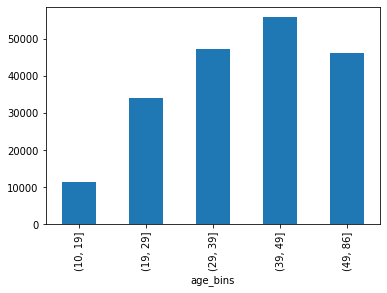

In [ ]:
(demo
 .pipe(clean_demo)
 .pipe(demo_trans, clean_address(address))
).groupby('age_bins')['past_3_years_bike_related_purchases'].sum().plot.bar()